**классификатор kNN**


Евгений Борисов esborisov@sevsu.ru

---

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
np.set_printoptions(precision=2) # ограничиваем точность float для печати

---

In [3]:
# генерируем два рандомных набора точек на плоскости
n = 150 # количество точек в одном наборе
data = [ rng.rand(n,2)+[0,0.0], rng.rand(n,2)+[0,0.6] ]

In [4]:
# разбираем точки в учебный набор
X = np.vstack(data) # матрица признаков
y = np.asarray( [0]*len(data[0]) + [1]*len(data[1]) ) # вектор меток класса

In [5]:
# точки для тестовой классификации
nn = 5
u = np.random.rand(nn,2)+[0,0.2]

---

In [6]:
# профиль компактности
def comp_prof(X,y):
    r = euclidean_distances(X) # матрица расстояний (Евклидова метрика)
    ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
    nc = y[ ri.flatten() ].reshape(r.shape) # номера классов для соседей в порядке увеличения расстояния 
    # инвертируем метку класса 1 для подсчёта точек-соседей из чужих классов
    nc = np.vstack([ (nc[ nc[:,0]==1 ]-1)*-1, nc[ nc[:,0]==0 ] ])
    # считаем чужих соседей k-тых в очереди удаления от объекта
    pc = np.asarray([ nc[:,k].sum() for k in range(1,nc.shape[1]) ])
    return pc / pc.max()

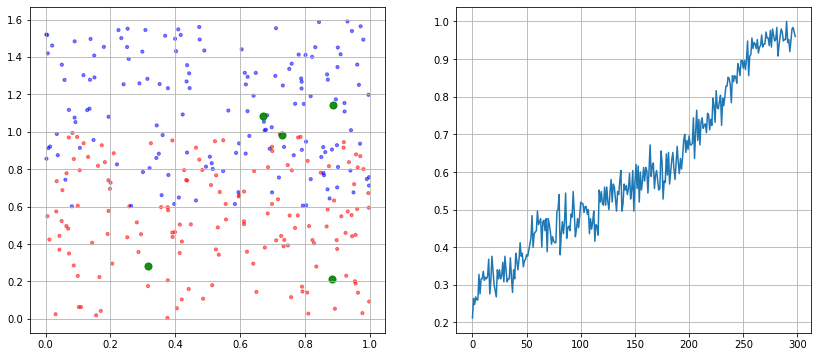

In [7]:
# рисуем точки

# создаём два элемента в ряд 
fig, (ax1,ax2) = plt.subplots(1,2, sharey=False, sharex=False, figsize=(14,6),)
# в первом рисуем точки 
ax1.scatter( X[:,0],X[:,1], s=10, alpha=0.5, c=list(map(lambda c:{0:'r',1:'b'}[c],y)) )
ax1.scatter( u[:,0],u[:,1],s=50, alpha=0.9, c='g')
ax1.grid()
# во втором рисуем профиль компактности
ax2.plot( comp_prof(X,y) ) 
ax2.grid()
# выводим всё на печать
plt.show()

---

In [8]:
r = euclidean_distances(u,X) # расстояния от тестовых точек u до точек учебного набора X
r

array([[0.22, 0.61, 0.98, ..., 0.62, 0.32, 0.41],
       [0.6 , 0.55, 0.79, ..., 1.33, 0.99, 0.85],
       [0.77, 0.2 , 0.22, ..., 1.11, 0.82, 0.58],
       [0.34, 0.68, 1.03, ..., 0.51, 0.25, 0.4 ],
       [0.33, 0.83, 1.2 , ..., 0.68, 0.47, 0.61]])

In [9]:
ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
ri

array([[ 46, 286, 109, ...,  47,  33,  86],
       [146, 128, 107, ..., 164, 226, 275],
       [ 49, 114,  16, ..., 265, 243, 253],
       [201, 177, 163, ...,  47,  33,  86],
       [214, 190, 171, ...,  47,  33,  86]])

In [10]:
nc = y[ ri.flatten() ].reshape(ri.shape) # номера классов для соседей в порядке увеличения расстояния 
nc

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [11]:
k=7 
knc = nc[:,:k] # классы ближайших k соседей
knc

array([[0, 1, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1]])

In [12]:
o = (knc.sum(axis=1) > k/2).astype(int) # какого класса больше в ближайших k соседях
o

array([1, 0, 0, 1, 1])

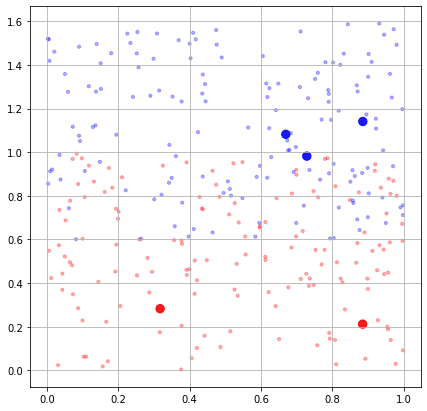

In [13]:
plt.figure(figsize=(7,7))
plt.scatter( X[:,0],X[:,1], s=10, alpha=0.3, c=list(map(lambda c:{0:'r',1:'b'}[c],y)) )
plt.scatter( u[:,0],u[:,1], s=70, alpha=0.9, c=list(map(lambda c:{0:'r',1:'b'}[c],o)) )
plt.grid()
plt.show()

In [14]:
# sklearn.neighbors.KNeighborsClassifier

In [ ]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#